# Table of Contents

1.Create basic data visualizations in Python  
2.Create basic data visualizations in Python  
3. Bar chart  
4.Scatter chart  
5. Histogram  
6. Random Subset  
7. Line chart  

## Step 1:

Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis'

In [3]:
path2 = r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis\04_Analysis\Visualizations'

In [4]:
# import dataframe

df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'customer_merged.pkl'))

In [5]:
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,Number_of_Dependants,fam_status,income,True,age,n_dependants
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3


## Step 2:

If you haven’t done so already, follow the instructions in the Exercise to create a (A) bar chart, a (B) scatterplot, a (C) histogram, and a (D) line chart, using a sample subset for the line chart.

### 2A. Create a bar chart for orders day of week

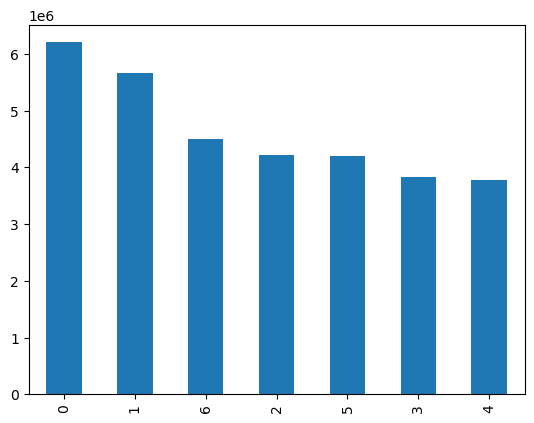

In [6]:
# create a bar chart using value counts function for orders day of week saved under the variable 'bar'

bar = df['orders_day_of_week'].value_counts().plot.bar()

In [7]:
# export the bar chart

bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_ords_dow.png'))

### 2B. Create a scatterplot for Prices

### 2B. As directed in the exercise, the details of this data cleaning will not be included in this notebook. However the scatterplot allowed us to isolate the outliers in our prices data set, there were many rows with artificially high prices

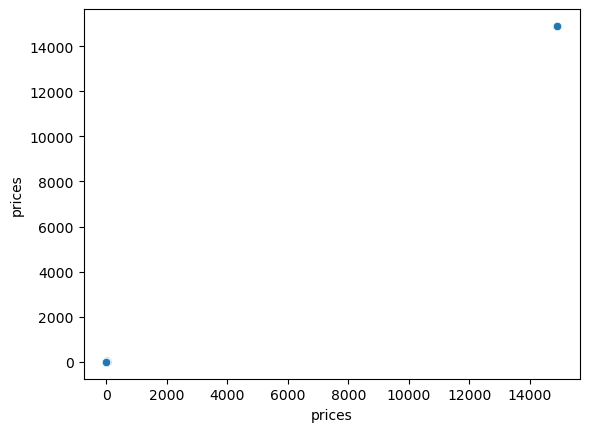

In [8]:
# store a scatterplot for prices on x and y axis in the variable scatplt

scatplt = sns.scatterplot(x='prices', y ='prices', data = df)

#### 2B. I will not export this scatterplot at this time as it is likely not useful to the final project

In [9]:
# since there are rows with inaccurately high prices, and it is skewing our analysis, we will manually mark them as missing

df.loc[df['prices']>100, 'prices'] = np.nan

In [10]:
# double check that this worked

df['prices'].max()

25.0

### 2C. Now a histogram can be made that shows the prices in bins of 70

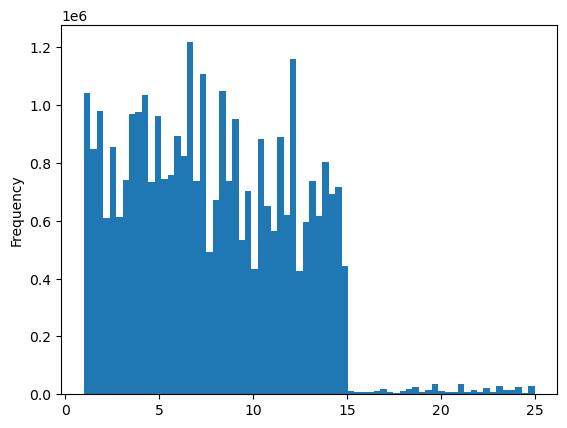

In [11]:
# store the historgram for prices in the variable 'hist'

hist = df['prices'].plot.hist(bins = 70)

In [12]:
# export the histogram

hist.figure.savefig(os.path.join(path,'04_Analysis', 'Visualizations', 'hist_prices_70.png' ))

### 2D. Line chart of prices and days of week

### 2D. In order to make a line chart more effectively we will use a subset of the dataframe. As opposed to just arbitrarily choosing rows, we will create a random representative sample of 70% of the data

In [5]:
# first we assign random numbers between 0-1 to a list then length of the dataframe

# then make an array (dev) containing the values less than or equal to 0.7

# we will use seed 4 in the random number generator for consistency

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# we can then split the data frame 70/30 using the values list in dev (70%) , and not in dev (30%)

big = df[dev]

In [ ]:
# 30 percent in the smaller dataframe

small = df[~dev]

In [16]:
# check that the number of rows match the data frame length
len(df)

32404859

In [17]:
# the data frame length should equal the two subsets added together

len(big) + len(small)

32404859

In [18]:
# divide the database futher into only the columns we need to make the line chart

df_2 = small [['orders_day_of_week', 'prices']]

### 2D. After this preparation, a line chart of orders day of week and prices can be made

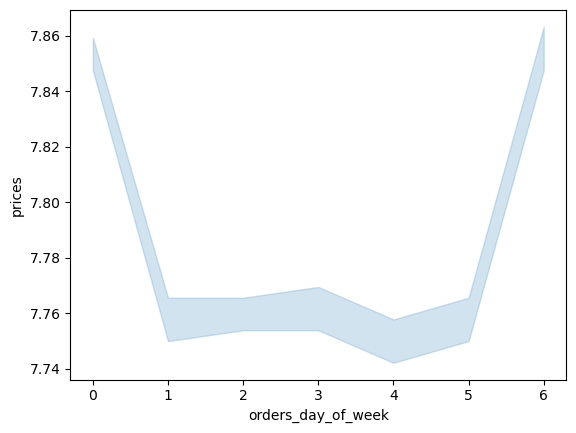

In [19]:
# line chart stored in the variable 'line'

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices',color =[0.2, 0.8, 0.2, 0.6])

In [28]:
# export the line chart

line.figure.savefig(os.path.join(path2, 'line_ords_dow.png'))

## Step 3:

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

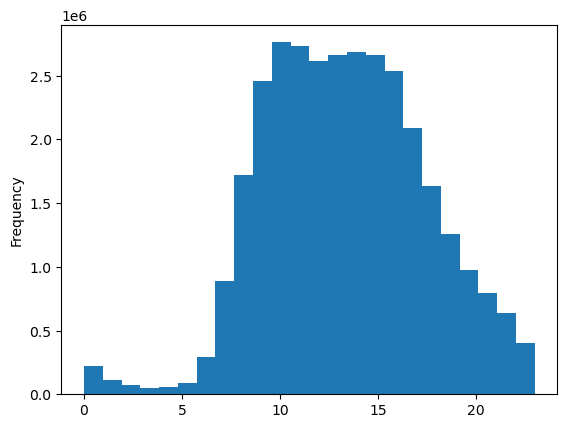

In [20]:
# making a histogram for hours of the day under hist_hour

hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

### 3. The histogram represents the frequency of orders for each hour of the day, the orders peak around 10-17 which would be 10am to 5pm

In [29]:
# export the histogram

hist_hour.figure.savefig(os.path.join(path2, 'histogram_hourod.png'))

## Step 4:

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

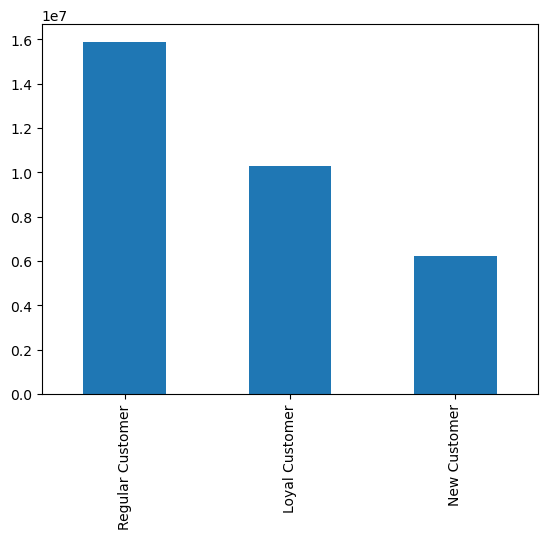

In [21]:
# a bar chart of value counts for customer loyalty 

cust_bar = df['loyalty_flag'].value_counts().plot.bar()

### Step 4:  This shows that the most number of orders come from regular customers, and followed by loyal customers

In [30]:
# export the bar chart

cust_bar.figure.savefig(os.path.join(path2, 'loyalty_bar.png'))

## Step 5:

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [22]:
# first we will make a small data frame with just the columns needed & using the "small" database we have already isolated

df_3 = small[['prices', 'order_hour_of_day'] ]

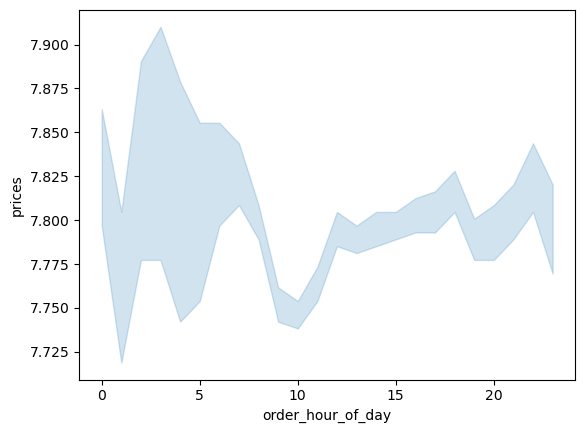

In [23]:
# next we can make a line chart using this smaller representatitve subset

line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [31]:
# export the line graph

line_hour.figure.savefig(os.path.join(path2, 'hourof_line.png'))

## Step 6:

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [24]:
# once again we will make a smaller df with just the columns we need

df_4 = small[['Age', 'Number_of_Dependants']]

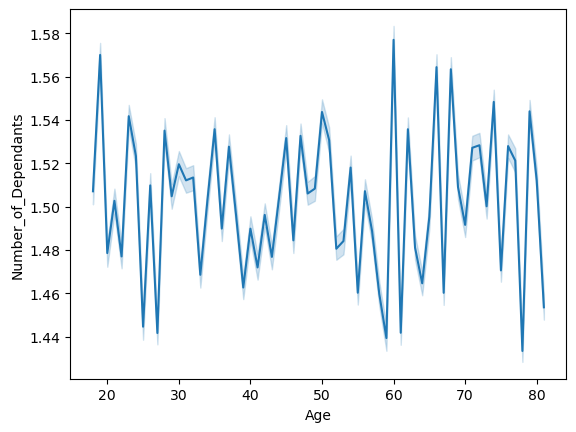

In [25]:
# now we can make our line chart

line_age = sns.lineplot (data = df_4, x = 'Age', y = 'Number_of_Dependants')

In [32]:
#export the line plot

line_age.figure.savefig(os.path.join (path2, 'age_dependants_line.png'))

### Step 6: This shows that there is not really a clear trend between age and dependants, although people under 18-20 will not have dependants which makes sense logically

## Step 7:

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

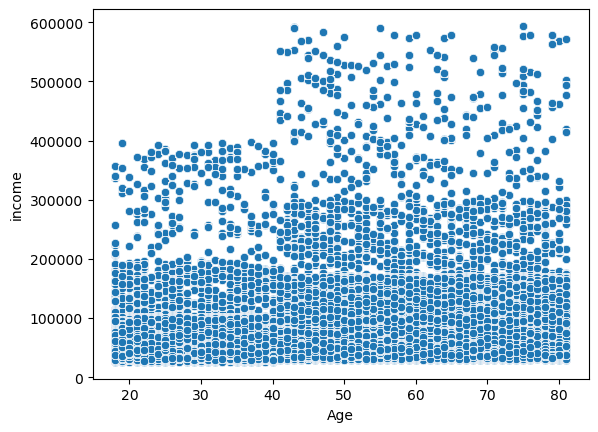

In [26]:
# create a scatterplot of age and income

scatter_income = sns.scatterplot(data = df, x= 'Age', y = 'income')

In [34]:
# export the scatterplot

scatter_income.figure.savefig(os.path.join(path2, 'income_scatter.png'))

## Step 7: This scatterplot shows that there is a pretty wide dispersion of incomes although it increases around 40. Most people are under 200,000

## Step 8: all visualizations are exported